In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pathlib import Path
import sklearn as skl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

In [3]:
df = pd.read_csv('/content/features_and_target.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20043 entries, 0 to 20042
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LAT         20043 non-null  float64
 1   LON         20043 non-null  float64
 2   WELL_DEPTH  20043 non-null  float64
 3   AS_CONC     20043 non-null  float64
dtypes: float64(4)
memory usage: 626.5 KB


In [4]:
X = df[['WELL_DEPTH', 'LAT', 'LON']]
X = X.to_numpy()
y = df[['AS_CONC']]
y = np.ravel(y)

<Axes: xlabel='LON', ylabel='LAT'>

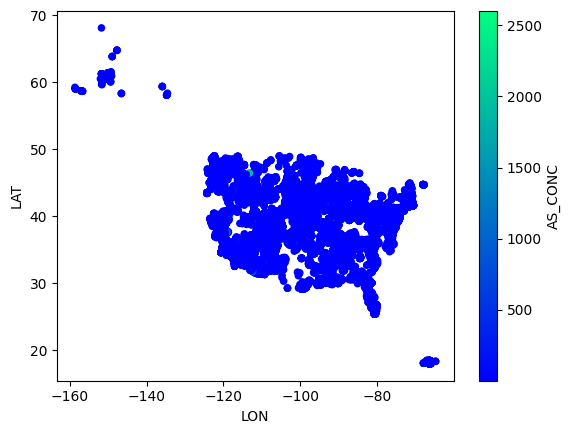

In [5]:
df.plot.scatter(x="LON", y="LAT", c="AS_CONC", colormap="winter")

In [6]:
X

array([[ 100.     ,   18.35361,  -64.75528],
       [  60.     ,   18.3525 ,  -64.7675 ],
       [   0.     ,   18.14972,  -65.79472],
       ...,
       [  33.     ,   59.05028, -158.56889],
       [  42.     ,   59.05667, -158.57111],
       [  57.     ,   59.26889, -158.63194]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor instance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the accuracy of the model


In [11]:
from tensorflow.keras.metrics import Accuracy
accuracy = Accuracy()

accuracy.update_state(y_true=y_test, y_pred=predictions)
accuracy.result().numpy()

0.06765117

ValueError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor instance
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

In [9]:
from sklearn.svm import SVR

# Create a Support Vector Regressor instance
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

ValueError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor instance
model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier instance
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

In [9]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(n_estimators=1)

In [10]:
model = model.fit(X_train, y_train)

In [11]:
predictions = model.predict(X_test)

In [12]:
# predictions_df = y_test
# predictions_df['predictions'] = predictions
# predictions_df

In [13]:
from tensorflow.keras.metrics import Accuracy
accuracy = Accuracy()

accuracy.update_state(y_true=y_test, y_pred=predictions)
accuracy.result().numpy()

0.43643984

In [14]:
X_test

array([[ 150.     ,   47.87305, -122.11361],
       [  52.     ,   29.60639,  -82.30334],
       [   0.     ,   41.14444, -104.87195],
       ...,
       [ 110.     ,   39.0075 , -112.44444],
       [   0.     ,   35.16222,  -91.08667],
       [ 150.     ,   40.36361,  -74.93611]])

In [15]:
davis = [[10, 38.54, -121.75]]
model.predict(davis)

array([3.])

In [16]:
predictions

array([16.,  1.,  2., ...,  5., 20.,  1.])

In [17]:
y_train

array([  4., 110.,  11., ...,   1.,   1.,   2.])